# Assignment Decision Tree (Company Data)

Decision Tree
 
Assignment


About the data: 
    
Let’s consider a Company dataset with around 10 variables and 400 records. 


The attributes are as follows: 
    
    
 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good 

and Medium indicating the quality of the shelving location for the car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not

The company dataset looks like this: 
 
 
 

Problem Statement:
    
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

Approach - A decision tree can be built with target variable Sale (we will first convert it 
                                                                   
in categorical variable) & all other variable will be independent in the analysis.  


### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,KFold,cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [2]:
Data=pd.read_csv("Company_Data.csv")
Data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## EDA

Text(0.5, 1.0, 'Education')

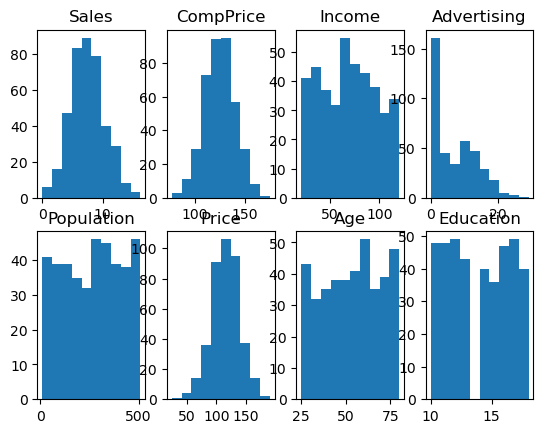

In [3]:
fig,axs=plt.subplots(2,4)
axs[0][0].hist(Data["Sales"])
axs[0][0].set_title("Sales")
axs[0][1].hist(Data["CompPrice"])
axs[0][1].set_title("CompPrice")
axs[0][2].hist(Data["Income"])
axs[0][2].set_title("Income")
axs[0][3].hist(Data["Advertising"])
axs[0][3].set_title("Advertising")
axs[1][0].hist(Data["Population"])
axs[1][0].set_title("Population")
axs[1][1].hist(Data["Price"])
axs[1][1].set_title("Price")
axs[1][2].hist(Data["Age"])
axs[1][2].set_title("Age")
axs[1][3].hist(Data["Education"])
axs[1][3].set_title("Education")

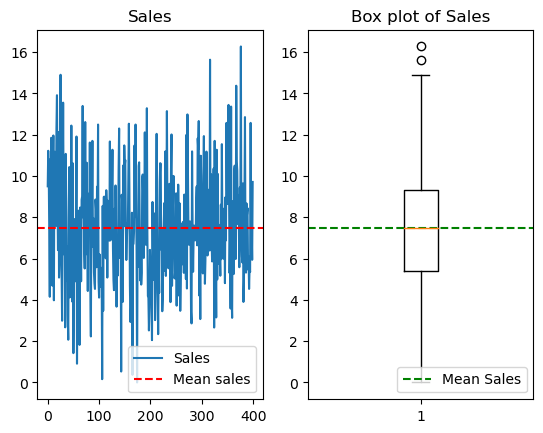

In [4]:
fig,axs=plt.subplots(1,2)
axs[0].plot(Data["Sales"],label="Sales")
axs[0].axhline(Data["Sales"].mean(),color='red',linestyle="--",label="Mean sales")
axs[0].set_title("Sales")
axs[0].legend(loc="lower right")
axs[1].boxplot(Data["Sales"])
axs[1].axhline(Data["Sales"].mean(),color='g',linestyle="--",label="Mean Sales")
axs[1].set_title("Box plot of Sales")
axs[1].legend(loc="lower right")

In [5]:
statistics.median(Data["Sales"])

7.49

In [6]:
Data["Sales"].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

### LABELLING THE SALES TO 3 CATEGORIES

###### Let us make category of sales as per Box plot distribution of Quantiles
###### below 1st Quartile====Category LOW
###### Within Inter Quartile====Category GOOD
###### Above 3rd Quartile====Category EXCELLENT

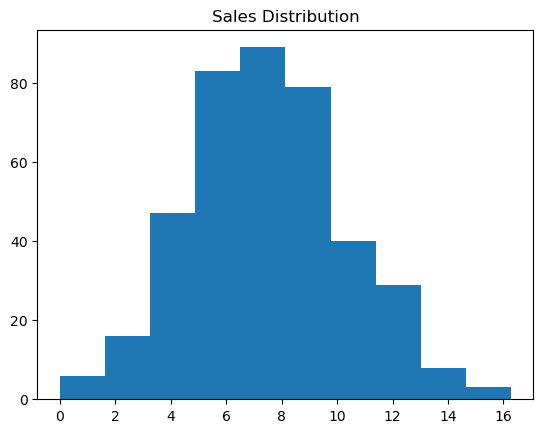

In [7]:
fig,ax=plt.subplots()
ax.hist(Data["Sales"])
ax.set_title("Sales Distribution")
plt.show()

In [8]:
Data["Sales"]=pd.cut(Data["Sales"],bins=[0,5.39,9.32,16.27],
                     labels=["Low","Good","Excellent"])

In [9]:
Data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Excellent,138,73,11,276,120,Bad,42,17,Yes,Yes
1,Excellent,111,48,16,260,83,Good,65,10,Yes,Yes
2,Excellent,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Good,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,Excellent,138,108,17,203,128,Good,33,14,Yes,Yes
396,Good,139,23,3,37,120,Medium,55,11,No,Yes
397,Good,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Good,100,79,7,284,95,Bad,50,12,Yes,Yes


In [10]:
Data[Data["Sales"].isnull()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
174,NaN,139,24,0,358,185,Medium,79,15,No,No


In [11]:
Data["Sales"].unique()

['Excellent', 'Good', 'Low', NaN]
Categories (3, object): ['Low' < 'Good' < 'Excellent']

In [12]:
Data.iloc[174,0]="Low"

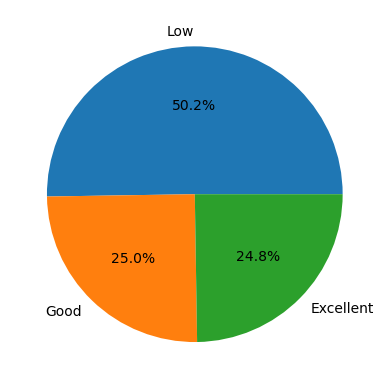

In [13]:
plt.pie(Data["Sales"].value_counts(),labels=["Low","Good","Excellent"],autopct='%1.1f%%')
plt.show()

### Assigning Dummy variables to Shelveloc,Urban,US

In [14]:
Data=pd.get_dummies(Data,columns=["ShelveLoc","Urban","US"])

### Label Encoding for each categories is Sales Feature

In [15]:
Data["Sales"]=LabelEncoder().fit_transform(Data["Sales"])

In [16]:
#cols=["ShelveLoc","Urban","US"]
#for col in cols:    
#        Data[col]=LabelEncoder().fit_transform(Data[col])

In [17]:
Y=Data["Sales"]
X=Data.iloc[:,1:]

### Train Test Sampling

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

### Hyper parameter Tuning Using Gridsearch CV

In [19]:
params={"max_depth":range(1,20,1),'min_samples_split':range(1,5,1)}
estimator=DecisionTreeClassifier(random_state=42)

In [20]:
gcv=GridSearchCV(estimator=estimator,param_grid=params,cv=5)

# Model Creating(with train_test split)

In [21]:
model=gcv.fit(X_train,Y_train)

C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
95 fits failed out of a total of 380.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
95 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Vivek\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0

In [50]:
results = gcv.cv_results_
best_scores = results['mean_test_score']
sorted_indices = best_scores.argsort()[::-1]
best_scores = best_scores[sorted_indices]
params = [results['params'][i] for i in sorted_indices]

# display the best scores for all parameters in descending order
for i, score in enumerate(best_scores):
    print("Parameters:", params[i], "Score:", score)

Parameters: {'max_depth': 1, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 8, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 13, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 12, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 16, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 11, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 10, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 9, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 17, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 7, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 15, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 6, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 18, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 5, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 4, 'min_samples_split': 1} Score: nan
Parameters: {'max_depth': 3, 'mi

In [22]:
print(gcv.best_params_)

{'max_depth': 10, 'min_samples_split': 2}


In [23]:
print(gcv.best_score_)

0.61875


In [36]:
DT=DecisionTreeClassifier(max_depth=10,min_samples_split=2,random_state=42)
model=DT.fit(X_train,Y_train)

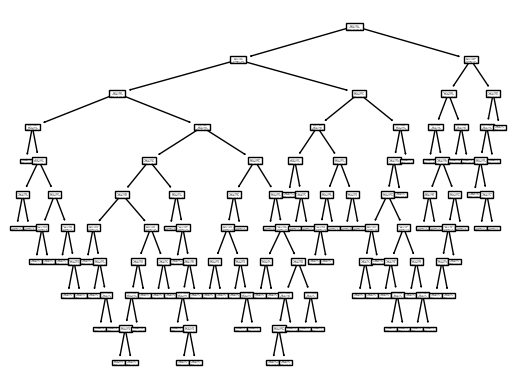

In [37]:
tree.plot_tree(DT)
plt.show()

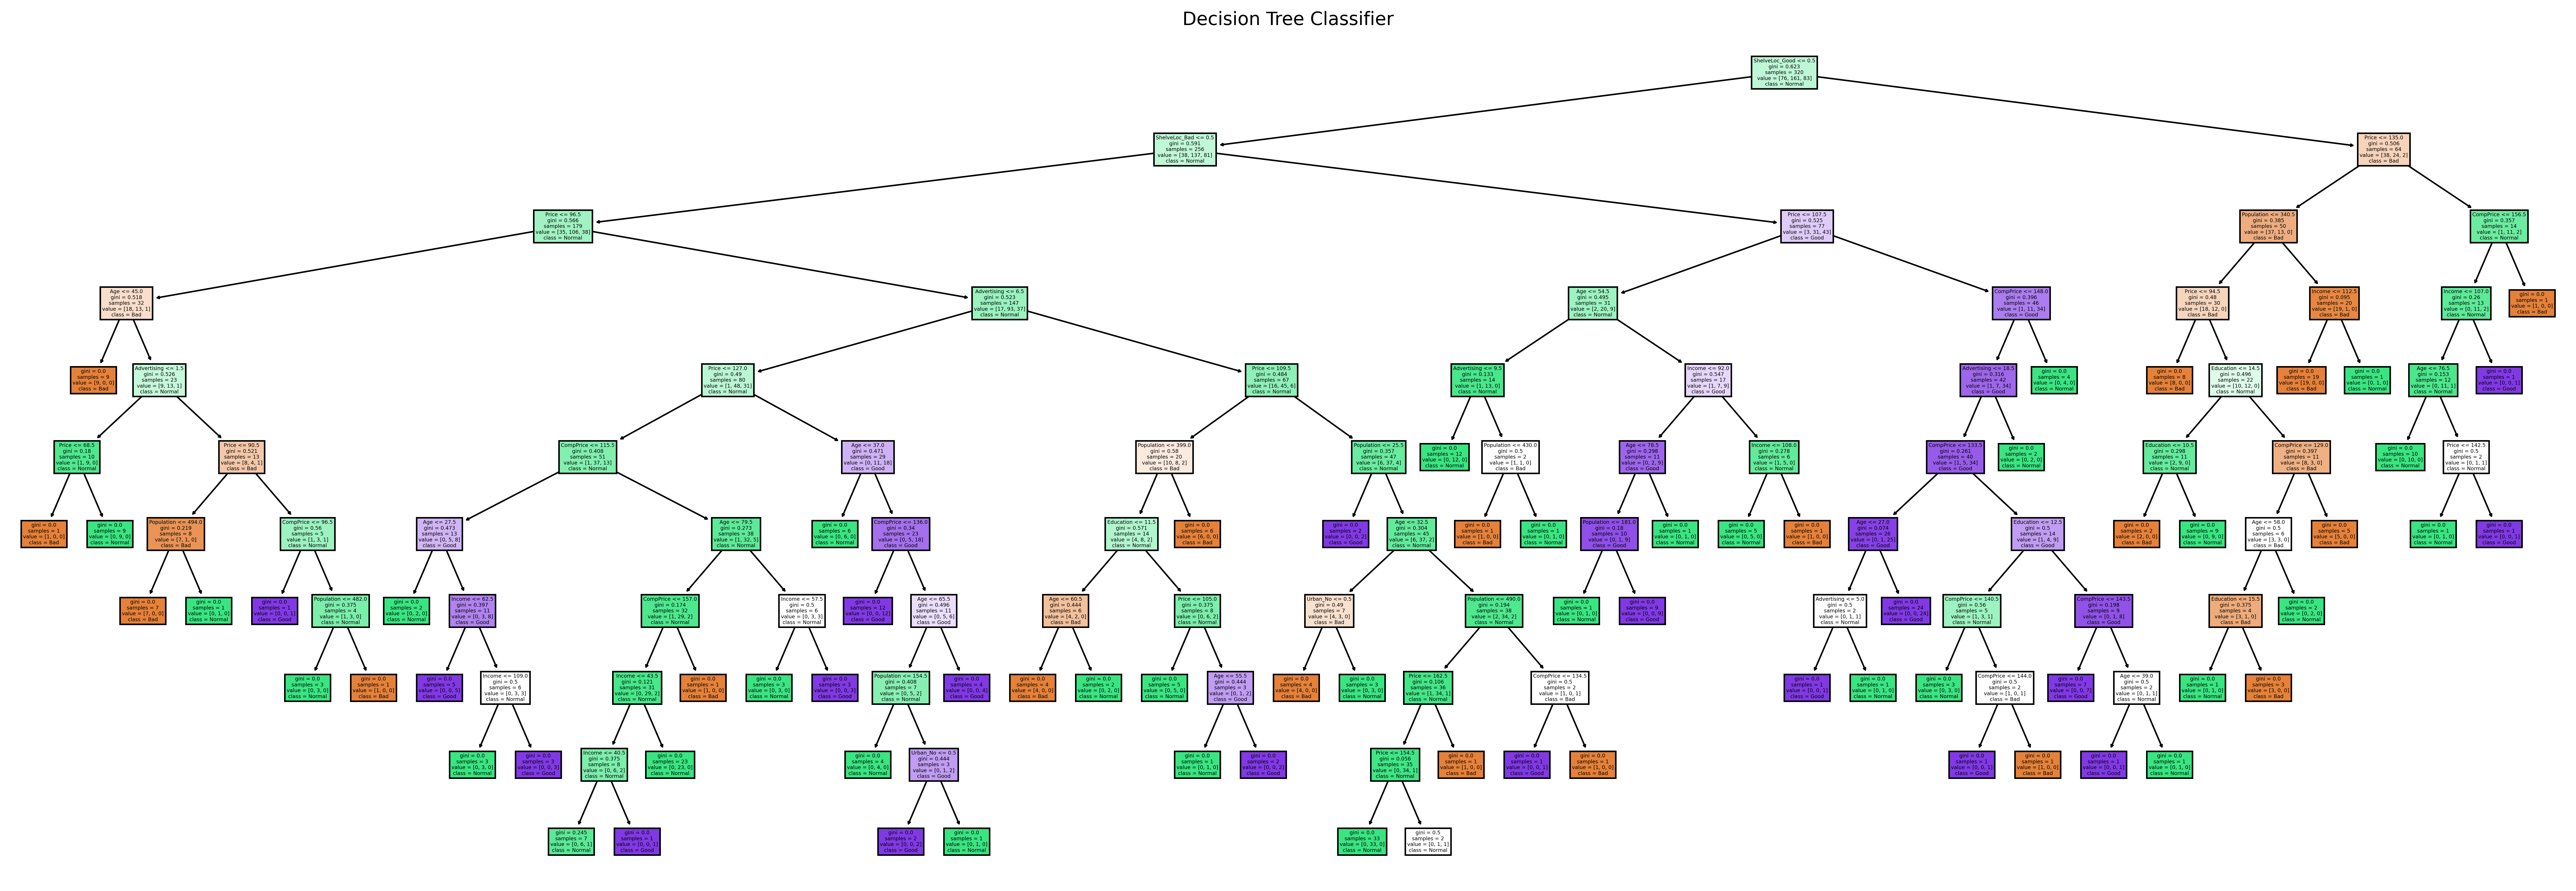

In [38]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(30,10),dpi=500)
tree.plot_tree(DT,class_names=("Bad","Normal","Good","Excellent"),
               feature_names=Data.iloc[:,1:].columns,filled=True)
axes.set_title("Decision Tree Classifier")
plt.show()

In [39]:
predict=model.predict(X_test)
pd.Series(predict).value_counts()

1    39
2    23
0    18
dtype: int64

##### Training Accuracy

In [40]:
print(accuracy_score(Y_train,model.predict(X_train)))

0.99375


In [41]:
print(classification_report(Y_train,model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       0.99      1.00      0.99       161
           2       1.00      0.98      0.99        83

    accuracy                           0.99       320
   macro avg       1.00      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320



##### Testing Accuracy

In [42]:
print(accuracy_score(Y_test,model.predict(X_test)))

0.625


In [43]:
print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

           0       0.72      0.57      0.63        23
           1       0.64      0.62      0.63        40
           2       0.52      0.71      0.60        17

    accuracy                           0.62        80
   macro avg       0.63      0.63      0.62        80
weighted avg       0.64      0.62      0.63        80



# Model with KFOLD validation technique

In [44]:
kfold = KFold(n_splits=10,shuffle=True, random_state=42)

In [46]:
Model=DecisionTreeClassifier(max_depth=10,min_samples_split=2,random_state=42)

In [47]:
results = cross_val_score(Model, X, Y, cv=kfold)
print(results.mean())

0.6175


In [48]:
y_pred = cross_val_predict(Model, X, Y, cv=kfold)

# Get classification report for predicted target values
print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68        99
           1       0.63      0.61      0.62       201
           2       0.53      0.58      0.56       100

    accuracy                           0.62       400
   macro avg       0.62      0.62      0.62       400
weighted avg       0.62      0.62      0.62       400



# Conclusion:

When using Decition Tree model accuracy is over fitting and tried different methods but accuracy not perfect so better go for ensemble models like bagging or Random Forest